# Logistic Regression
AU 16 CSE 5539-0010 "Social Media and Text Analysis" Homework #2  
Alan Ritter, The Ohio State University   

In this assignment, we will walk you through the process of :

- implementing logistic regression from scratch 
- and applying it to a real-world problem that predicts whether a student will be admitted to a university. 


<div class="alert alert-danger">
IMPORTANG: In this assignment, except Numpy and Matplotlib, no other external Python packages are allowed. Scipy is used in gradient checking, though, it is not allowed elsewhere. 
</div>

**Honor Code:** I hereby agree to abide the Ohio State University's Code of Student Conduct, promise that the submitted assignment is my own work, and understand that my code is subject to plagiarism test.

**Signature**: (Naveen Tumkur Ramesh Babu)

## 0. Importing Numpy and Matplotlib [Code provided - do not change]

In [3]:
import sys

# Check what version of Python is running
print (sys.version)

3.6.3 (default, Oct  4 2017, 06:09:15) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]


You will need to have Numpy installed for the right version of Python. Most likely, you are using Python 3.6 in this Jupyter Notebook; then you may [install Numpy accordingly](https://stackoverflow.com/questions/37933978/install-numpy-in-python-3-4-4-and-linux). For example, installng Numpy via pip by using the command line "sudo python3.4 -m pip install numpy". If failed, you may need to update pip first by "python3.4 -m pip install --upgrade pip".

In [4]:
# Run some setup code for this notebook. Don't modify anything in this cell.

import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# reload external python modules;
# http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## 1. Visualizing the Data  [Code provided - no need to change]

The provided dataset contains applicants' scores on two exams and the admission decisons. 

[Matplotlib](http://matplotlib.org/users/pyplot_tutorial.html) is a Python package for data visualization. Suppose you are using Python 3.4, you can install by first use command line "brew install freetype", then "sudo python3.4 -m pip install matplotlib". 


# of training examples =  100
# of features =  2


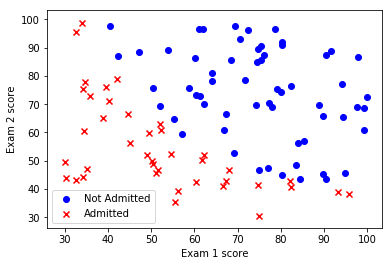

In [5]:
#load the dataset
data = np.loadtxt('hw2_data.txt', delimiter=',')

train_X = data[:, 0:2]
train_y = data[:, 2]

# Get the number of training examples and the number of features
m_samples, n_features = train_X.shape
print ("# of training examples = ", m_samples)
print ("# of features = ", n_features)

pos = np.where(train_y == 1)
neg = np.where(train_y == 0)
plt.scatter(train_X[pos, 0], train_X[pos, 1], marker='o', c='b')
plt.scatter(train_X[neg, 0], train_X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Not Admitted', 'Admitted'])
plt.show()

## 2. Cost Function [5 points]
You're going to first implement the sigmoid function, then the cost function for (binary) logistic regression. 

In [6]:
def sigmoid(z):
    """ Sigmoid function """
    ###################################################################
    # Compute the sigmoid function for the input here.                #
    ###################################################################
    
    ### YOUR CODE HERE: be careful of the potential underflow or overflow here
    # The largest value represented by a numpy float64 is 1.7976931348623157e+308,
    # whose log is approx 709.782712893384.
    # So, we clip all values<-709.782712893384 to -709.782712893384
    
    # The least value(>0) represented by a numpy float64 is 2.2204460492503131e-16, 
    # whose log is approx -36.04365338911715
    # So, we clip all values>36.04365338911715 to 36.04365338911715
    #
    
    largest_f64 = 709.782712893384
    least_val_great_zero = -36.04365338911715
    y = np.clip(z, -1*largest_f64, -1*least_val_great_zero)
    s=1/(1+np.exp(-1*y))
    
    
    
    ### END YOUR CODE
    
    return s

# Check your sigmoid implementation
z = np.array([[1, 2], [-1, -2]])
f = sigmoid(z)
print ("=== For autograder ===")
print (f)

=== For autograder ===
[[0.73105858 0.88079708]
 [0.26894142 0.11920292]]


In [8]:
def cost_function(theta, X, y):
    """ The cost function for logistic regression """
    #####################################################################################
    # Compute the cost given the current parameter theta on the training data set (X, y)#
    #####################################################################################
     
    ### YOUR CODE HERE
    
    z = np.dot(theta, X.T)
    h_x = sigmoid(z)
    cost = (-1.0/len(y)) * np.sum(np.multiply(y,np.log(h_x))+np.multiply(1-y, np.log(1-h_x)))
    
    
    
    ### END YOUR CODE
    
    return cost

# Check your cost function implementation
t_X = np.array([[1, 2], [-1, -2]])
t_y = np.array([0, 1])
t_theta1 = np.array([-10, 10])
t_theta2 = np.array([10, -10])
t_c1 = cost_function(t_theta1, t_X, t_y)
t_c2 = cost_function(t_theta2, t_X, t_y)
print ("=== For autograder ===")
print (t_c1)
print (t_c2)

=== For autograder ===
10.000045398899701
4.539889921682063e-05


## 3. Gradient Computation [5 points]

Implement the gradient computations for logistic regression. 

In [11]:
def gradient_update(theta, X, y):
    """ The gradient update for logistic regression"""
    ###############################
    # Compute the gradient update #
    ###############################
    
    ### YOUR CODE HERE
    
    z = np.dot(theta, X.T)
    h_x = sigmoid(z)
    grad = np.zeros(theta.shape)
    
    for i in range(grad.shape[0]):
        term = np.multiply((h_x - y), X[:,i].T)
        grad[i] = np.sum(term)
    
    
    

    ### END YOUR CODE
    
    grad = grad / (X.shape[0])   
    
    return grad

# Check your gradient computation implementation
t_X = np.array([[1, 2], [-1, -2]])
t_y = np.array([0, 1])
t_theta1 = np.array([-10, 10])
t_theta2 = np.array([10, -10])
t_g1 = gradient_update(t_theta1, t_X, t_y)
t_g2 = gradient_update(t_theta2, t_X, t_y)
print ("=== For autograder ===")
print (t_g1)
print (t_g2)

=== For autograder ===
[0.9999546 1.9999092]
[4.53978687e-05 9.07957374e-05]


## 4. Gradient Checking [Code provided. Bonus 10 points if implemented from scratch]
You can use the code provided below to check the gradient of your logistic regression functions. Alternatively, you can implementing the gradient checking from scratch by yourself (bonus 10 points). 

[Gradient checking](http://ufldl.stanford.edu/tutorial/supervised/DebuggingGradientChecking/) is an important technique for debugging the gradient computation. Logistic regression is a relatively simple algorithm where it is straightforward to derive and implement its cost function and gradient computation. For more complex models, the gradient computaitn can be notoriously difficulty to debug and get right. Sometimes a subtly buggy implementation will manage to learn something that can look surprisingly reasonable, while performing less well than a correct implementation. Thus, even with a buggy implementation, it may not at all be apparent that anything is amiss. 

In [12]:
# Check your gradient computation implementation
t_samples, t_features = 100, 10
t_X = np.random.randn(t_samples, t_features)
t_y = np.random.randint(2, size=t_samples) 
t_theta = np.random.randn(t_features)

from scipy import optimize
print ("=== For autograder ===")
print('Output of check_grad: %s' % optimize.check_grad(cost_function, gradient_update, t_theta, t_X, t_y))

ModuleNotFoundError: No module named 'scipy'

## 5. Gradient Descent  and Decision Boundary  [15 points]

Implement the batch gradient decent algorithm for logistic regression. For every 25 iteration, also visualize the decision boundary and obeserve how it changes during the training.

[ Iteration 1 ] cost = 0.7404978833780697


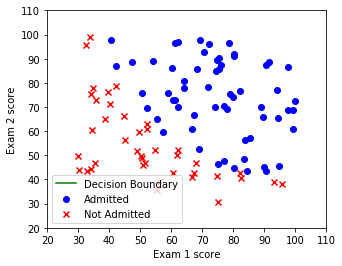

[ Iteration 25 ] cost = 0.6462636782403495


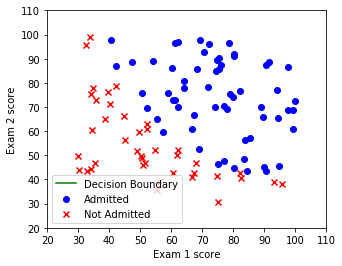

[ Iteration 50 ] cost = 0.5902466300915485


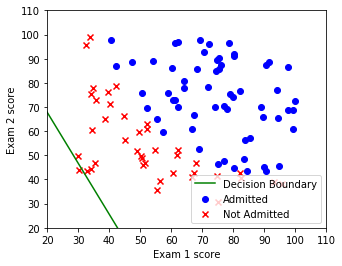

[ Iteration 75 ] cost = 0.5450737870060107


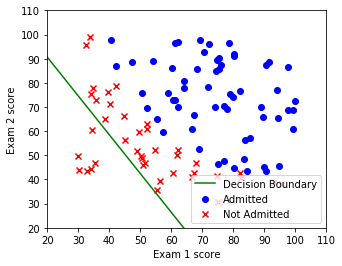

[ Iteration 100 ] cost = 0.5083522358891419


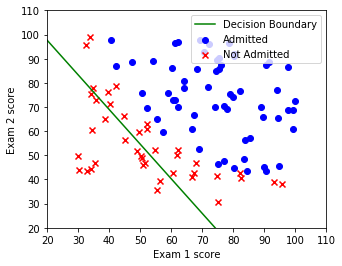

[ Iteration 125 ] cost = 0.4781800606037843


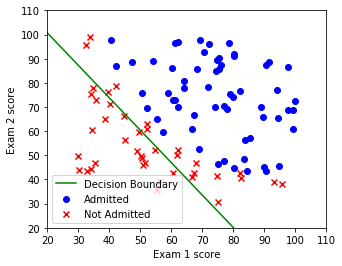

[ Iteration 150 ] cost = 0.45309630467666234


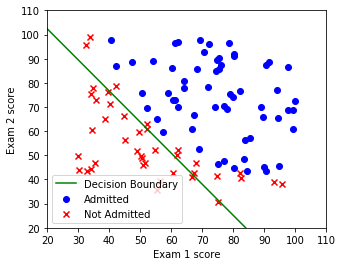

[ Iteration 175 ] cost = 0.4319954889456221


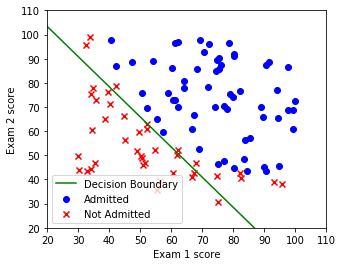

[ Iteration 200 ] cost = 0.4140438012204337


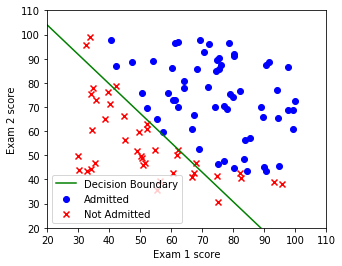

[ Iteration 225 ] cost = 0.39860994777357733


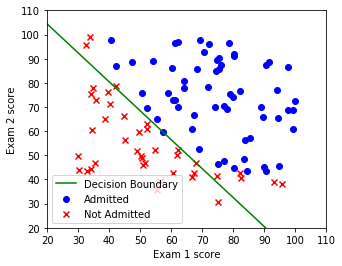

[ Iteration 250 ] cost = 0.3852122638932674


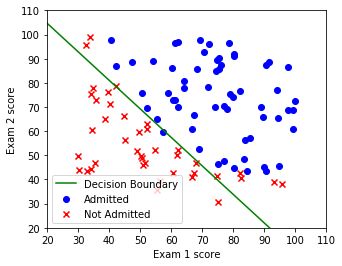

[ Iteration 275 ] cost = 0.373479653225837


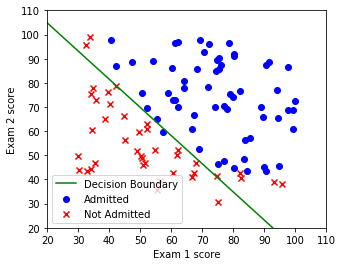

[ Iteration 300 ] cost = 0.36312315641284765


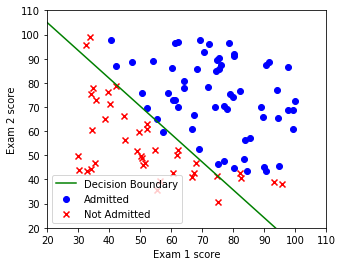

[ Iteration 325 ] cost = 0.35391532631064


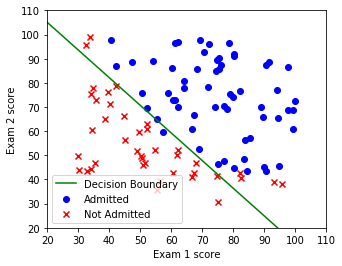

[ Iteration 350 ] cost = 0.345675222979659


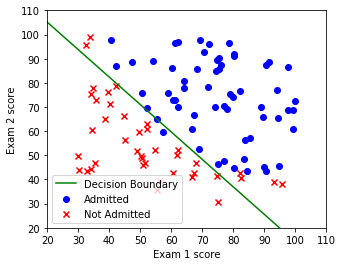

[ Iteration 375 ] cost = 0.33825742693560273


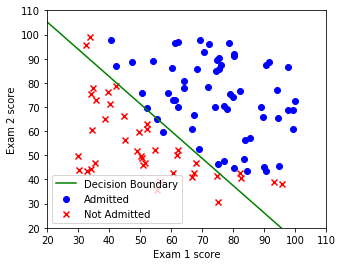

[ Iteration 400 ] cost = 0.33154392723776227


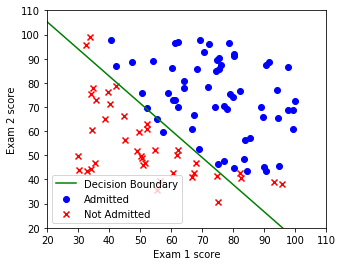

In [16]:
def gradient_descent(theta, X, y, alpha=1e-2, max_iterations=400):
    """ Batch gradient descent algorithm """
    #################################################################
    # Update the parameter 'theta' iteratively to minimize the cost #
    # Also visualize the decision boundary during learning          #
    #################################################################
 
    alpha *= X.shape[0]
    iteration = 0
    
    ### YOUR CODE HERE: 
    
    X_bias = np.ones((X.shape[0],X.shape[1]+1))
    X_bias[:,1:] = X
    max_value = np.max(np.absolute(X_bias), axis=0)
    X_bias = X_bias*1./max_value
    
        
    ### END YOUR CODE
    
    
    
    while(iteration < max_iterations):
        iteration += 1
        
        ### YOUR CODE HERE: simultaneous update of partial gradients
    
        theta = theta - (alpha*gradient_update(theta, X_bias, y))
    
    
    
        ### END YOUR CODE

        
        # For every 25 iterations
        if iteration % 25 == 0 or iteration == 1:
            cost = 0
            
            ### YOUR CODE HERE: calculate the cost
            ### IMPORTANT: The cost function is guaranteed to decrease after 
            ## every iteration of the gradient descent algorithm.
    
    
            cost = cost_function(theta, X_bias, y)
    
    
            ### END YOUR CODE
            
            print ("[ Iteration", iteration, "]", "cost =", cost)
            plt.rcParams['figure.figsize'] = (5, 4)
            plt.xlim([20,110])
            plt.ylim([20,110])
            
            pos = np.where(y == 1)
            neg = np.where(y == 0)
            
            plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
            plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
            plt.xlabel('Exam 1 score')
            plt.ylabel('Exam 2 score')
            plt.legend(['Not Admitted', 'Admitted'])
            t = np.arange(10, 100, 0.1)
            
            
            ### YOUR CODE HERE: plot the decision boundary
    
            t_new = t*1./max_value[1]
            x2 = -1*(theta[0] + theta[1]*t_new)/theta[2]
            x2 = x2*max_value[2]
            plt.plot(t, x2,'g-')
            plt.legend(['Decision Boundary','Admitted', 'Not Admitted'])
    
    
            ### END YOUR CODE 
            
            plt.show()
               
    return theta


### YOUR CODE HERE: initialize the parameters 'theta' to random values
    
initial_theta = np.random.randn(train_X.shape[1]+1)

# Storing training data scaling values, which will be used for test data
tmax_values = np.ones((1,train_X.shape[1]+1))
tmax_values[:,1:] = np.max(np.absolute(train_X), axis=0)
    
    
    
### END YOUR CODE


learned_theta = gradient_descent(initial_theta, train_X, train_y)

### 6. Predicting [5 points]
Now that you learned the parameters of the model, you can use the model to prdict whether a particular student will be admited. 

In [17]:
def predict(theta, X):
    """ Predict whether the label is 0 or 1 using learned logistic regression parameters """

    ### YOUR CODE HERE: 
    
    if type(X) is list:
        X=np.array(X)
    
    X_bias = np.ones((X.shape[0],X.shape[1]+1))
    X_bias[:,1:] = X
    X_bias = X_bias*1./tmax_values
    
    probabilities = sigmoid(np.dot(theta,X_bias.T))
    predicted_labels = (probabilities >= 0.5).astype(float)
    
    
    
    ### END YOUR CODE
    
    
    ## convert an array of booleans 'predicted_labels' into an array of 0 or 1 intergers
    return probabilities, 1*predicted_labels 

# Check your predication function implementation
t_X1 = [[90, 90]]
t_X2 = [[50, 60]]
t_X3 = [[50, 50]]
print ("=== For autograder ===")
print (predict(learned_theta, t_X1))
print (predict(learned_theta, t_X2))
print (predict(learned_theta, t_X3))

# Computer accuracy on the training dateset 
t_prob, t_label = predict(learned_theta, train_X)
t_precision = t_label[np.where(t_label == train_y)].size / float(train_y.size) * 100
print ("=== For autograder ===")
print('Accuracy on the training set: %s%%' % round(t_precision,2))

=== For autograder ===
(array([0.96698319]), array([1.]))
(array([0.35087932]), array([0.]))
(array([0.24083258]), array([0.]))
=== For autograder ===
Accuracy on the training set: 92.0%


### 7. Submit Your Homework
This is the end. Congratulations! 

Now, follow the steps below to submit your homework in [Carmen](https://carmen.osu.edu/):

1. rename this ipynb file to 'hw2_yourdotid.ipynb' 
2. click on the menu 'File' --> 'Download as' --> 'Python (.py)'
3. pack both the above 'hw2_yourdotid.ipynb' file and the 'hw2_yourdotid.py' file into a zip file 'hw2_yourdotid.zip'
4. upload the zip file 'hw2_yourdotid.zip' in Carmen